<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/RogueAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
for j in range(0,40):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='RogueAP'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_23.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_24.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_25.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_26.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_27.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_36.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/4.Rogue_AP/RogueAP_39.csv"]), ignore_index=True)

In [ ]:
df.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.datarate,radiotap.dbm_antsignal,radiotap.length,radiotap.mactime,radiotap.present.tsft,radiotap.rxflags,radiotap.timestamp.ts,radiotap.vendor_oui,wlan.duration,wlan.analysis.kck,wlan.analysis.kek,wlan.bssid,wlan.country_info.fnm,wlan.country_info.code,wlan.da,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.fcs.bad_checksum,wlan.fixed.beacon,wlan.fixed.capabilities.ess,wlan.fixed.capabilities.ibss,wlan.fixed.reason_code,wlan.fixed.timestamp,wlan.ra,wlan_radio.duration,wlan.rsn.ie.gtk.key,wlan.rsn.ie.igtk.key,wlan.rsn.ie.pmkid,wlan.sa,wlan.seq,wlan.ssid,wlan.ta,wlan.tag,wlan.tag.length,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.end_tsf,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.phy,wlan_radio.timestamp,wlan.rsn.capabilities.mfpc,wlan_rsna_eapol.keydes.msgnr,wlan_rsna_eapol.keydes.data,wlan_rsna_eapol.keydes.data_len,wlan_rsna_eapol.keydes.key_info.key_mic,wlan_rsna_eapol.keydes.nonce,eapol.keydes.key_len,eapol.keydes.replay_counter,eapol.len,eapol.type,llc,arp,arp.hw.type,arp.proto.type,arp.hw.size,arp.proto.size,arp.opcode,arp.src.hw_mac,arp.src.proto_ipv4,arp.dst.hw_mac,arp.dst.proto_ipv4,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,data.data,data.len,icmpv6.mldr.nb_mcast_records,icmpv6.ni.nonce,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.analysis.flags,tcp.analysis.retransmission,tcp.analysis.reused_ports,tcp.analysis.rto_frame,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,udp.dstport,udp.srcport,udp.length,udp.payload,udp.time_relative,udp.time_delta,nbns,nbss.continuation_data,nbss.type,nbss.length,ldap,smb.access.generic_execute,smb.access.generic_read,smb.access.generic_write,smb.flags.notify,smb.flags.response,smb.flags2.nt_error,smb.flags2.sec_sig,smb.mid,smb.nt_status,smb.server_component,smb.pid.high,smb.tid,smb2.acct,smb2.auth_frame,smb2.buffer_code,smb2.cmd,smb2.data_offset,smb2.domain,smb2.fid,smb2.filename,smb2.header_len,smb2.host,smb2.msg_id,smb2.pid,smb2.previous_sesid,smb2.protocol_id,smb2.sesid,smb2.session_flags,smb2.tid,smb2.write_length,dhcp,dhcp.client_id.duid_ll_hw_type,dhcp.cookie,dhcp.hw.addr_padding,dhcp.hw.mac_addr,dhcp.id,dhcp.ip.client,dhcp.ip.relay,dhcp.ip.server,dhcp.option.broadcast_address,dhcp.option.dhcp_server_id,dhcp.option.router,dhcp.option.vendor.bsdp.message_type,mdns,dns,dns.a,dns.count.add_rr,dns.count.answers,dns.count.auth_rr,dns.count.labels,dns.count.queries,dns.flags.authoritative,dns.flags.checkdisable,dns.flags.opcode,dns.flags.response,dns.id,dns.ptr.domain_name,dns.qry.name,dns.qry.name.len,dns.resp.len,dns.resp.name,dns.resp.ttl,dns.resp.len.1,dns.retransmit_request,dns.retransmit_response,dns.time,ssdp,http.connection,http.content_length,http.content_type,http.date,http.file_data,http.host,http.last_modified,http.location,http.next_request_in,http.next_response_in,http.request.full_uri,http.request.line,http.request.method,http.request.uri.path,http.request.uri.query,http.request.uri.query.parameter,http.request.version,http.request_in,http.response.code,http.response.code.desc,http.response.line,http.response.phrase,http.response.version,http.response_for.uri,http.response_in,http.referer,http.time,http.server,json.value.string,json.key,ssh.cookie,ssh.compression_algorithms_client_to_server_length,ssh.compression_algorithms_server_to_client_length,ssh.direction,ssh.dh_gex.max,ssh.dh_gex.min,ssh.dh_gex.nbits,ssh.encryption_algorithms_client_to_server_length,ssh.encryption_algorithms_server_to_client_length,ssh.host_key.length,ssh.host_key.type_length,ssh.kex_algorithms_length,ssh.mac

In [ ]:
drop_cols = []
for i in df.columns:
    if len(df[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df.drop(drop_cols, 1, inplace=True)

print(df.columns)

Total columns with only 1 unique value: 59
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=195)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743939 entries, 0 to 743938
Columns: 202 entries, frame.encap_type to Label
dtypes: float64(76), object(126)
memory usage: 1.1+ GB


In [ ]:
df.dropna(1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823186 entries, 0 to 823185
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   823186 non-null  int64  
 1   frame.number                823186 non-null  int64  
 2   frame.time                  823186 non-null  object 
 3   frame.time_delta            823186 non-null  float64
 4   frame.time_delta_displayed  823186 non-null  float64
 5   frame.time_epoch            823186 non-null  int64  
 6   frame.time_relative         823186 non-null  float64
 7   radiotap.dbm_antsignal      823186 non-null  int64  
 8   radiotap.length             823186 non-null  int64  
 9   radiotap.present.tsft       823186 non-null  object 
 10  radiotap.timestamp.ts       823186 non-null  int64  
 11  wlan.fc.ds                  823186 non-null  object 
 12  wlan.fc.frag                823186 non-null  int64  
 13  wlan.fc.order 

In [ ]:
#for data imbalance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
df_majority = df[df.Label=='Normal']
df_minority = df[df.Label=='RogueAP']
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=10000,    
                                 random_state=10) 

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822452 entries, 0 to 469953
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   822452 non-null  int64  
 1   frame.number                822452 non-null  int64  
 2   frame.time                  822452 non-null  object 
 3   frame.time_delta            822452 non-null  float64
 4   frame.time_delta_displayed  822452 non-null  float64
 5   frame.time_epoch            822452 non-null  int64  
 6   frame.time_relative         822452 non-null  float64
 7   radiotap.dbm_antsignal      822452 non-null  int64  
 8   radiotap.length             822452 non-null  int64  
 9   radiotap.present.tsft       822452 non-null  object 
 10  radiotap.timestamp.ts       822452 non-null  int64  
 11  wlan.fc.ds                  822452 non-null  object 
 12  wlan.fc.frag                822452 non-null  int64  
 13  wlan.fc.order 

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df_upsampled,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal     246556
RogueAP      3007
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

In [ ]:
train['Label'].value_counts()
test['Label'].value_counts()

Normal     246556
RogueAP      3007
Name: Label, dtype: int64

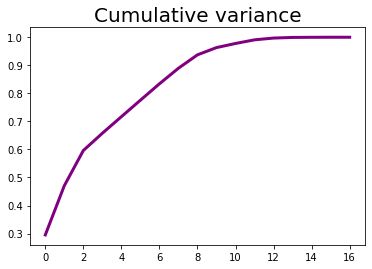

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
frame.len,0.742807,0.037834,-0.207307,-0.059800,0.022428,-0.017375,0.011499,0.445513,-0.153501,0.246517,-0.332321,-0.054287,-0.055471,-0.006547,-0.000034,0.000103,3.646745e-08
frame.number,0.119351,-0.990883,0.033315,0.007857,0.003879,0.004729,0.000160,0.007014,-0.013178,-0.009007,-0.000803,-0.000410,0.004570,-0.002826,0.008648,-0.047856,7.484778e-06
frame.time_epoch,0.121430,-0.991416,0.036614,0.007153,0.002611,0.003971,0.001502,0.011334,-0.010957,-0.007524,0.003674,0.001073,-0.000125,0.001636,-0.005865,0.023881,2.551520e-03
radiotap.dbm_antsignal,0.064591,-0.075687,-0.974420,-0.008275,0.026061,-0.000836,-0.027641,-0.048204,0.174740,-0.022583,0.029716,-0.028586,0.005701,-0.000513,0.062951,0.005579,-1.968463e-08
radiotap.length,0.912677,0.058209,-0.009345,-0.109430,0.042849,0.019525,-0.011049,-0.176187,-0.090306,0.189191,0.068888,0.205290,0.117295,-0.116583,0.001569,0.000924,2.363792e-07


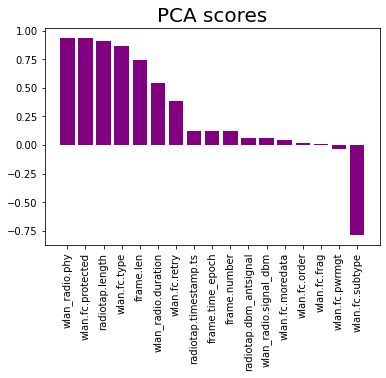

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()